In [137]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [138]:
df=pd.read_csv('/Users/Marina/Documents/hinge/ratings_sample.csv', encoding='ISO-8859-1')

# Part 2

In building my algorithm(s), I used two approaches. In the first approach, I trained and tested one algorithm for both genders. In the second approach, to account for gender differences, I trained and tested two algorithms: one is for female players and the other one is for male players. My strategy here was to improve recall accuracy. Because of imbalanced classes (less subjects were liked in the data set ~17%), recall and precision usually suffer and while it is easy to predict subjects that are not liked, it is more difficult to predict subjects that are liked. However, for Hinge, recalling subjects that are liked is very important for business success. The more accurate algorithm predicts subjects that are liked, the more likely people use the application. Therefore, improving recall accuracy should be the main goal.


For this reason, I chose to train ensembles such as Decision Tree, Bagging DT, Random Forest, Extra Trees, Ada Boost, and Gradient Boosting, and for comparison I also included logistic regression. Why ensembles?  Well, simply because there has been research in machine learning, (and I also devoted a significant time researching this problem on my own) indicating that ensembles in conjunction with SMOT (synthetic minority oversampling techniques) can combat imbalanced classes and significantly improve precision and recall of the imbalanced class. However, SMOT works only well with ensembles and it does not do a lot for other algorithms. Therefore, ensembles were my choice. I am not going to present all the outputs here as it took a very long time to run models because of the large sample size. Basically, my strategy was the same as I used in my blog positing. For details, please read the positing: https://dmarinav.github.io/data%20science/speed-dating-part2/

I trained ensembles without SMOT and with SMOT. In the output here, you will see predictive accuracy across ensembles without SMOT. I also ran the same ensembles with various SMOTs (not shown on the output) and then selected the one that would give me a higher predictive accuracy. I optimized the algorithm and then tested it on the original data. 

In the first approach, I also demonstrated how SMOT is effective and can drastically improve accuracy of either precision or recall or both. Thus, I compared precision, recall, and AUC of the ensemble without SMOT with the same ensemble with SMOT. 


In [139]:
df.head()

,like,player_id,subject_id,player_age,player_height,player_age_max,player_age_min,player_distance_max,player_height_min,player_height_max,...,player_location,subject_gender_orientation,subject_hometown,subject_metro,subject_location,distance,player_saved,player_rated,subject_saved,subject_rated
0,0,8273b4e96e0a1c2dba27e648c58c188489fab7f4,4f261692e5d9c9d5df3044f5bf198decb10fef37,28,160,34,27,38,92,214,...,Entertainment_District,MS,Charlotte_North_Carolina,Charlotte,Piper_Glen_Estates,597.758599,0,0,0,0
1,0,8273b4e96e0a1c2dba27e648c58c188489fab7f4,a4bdbd52034a4da46b38fce744a18314c91126ba,28,160,34,27,38,92,214,...,Entertainment_District,MS,Guaynabo_Puerto_Rico,Orlando,Casselberry,1044.507045,0,0,0,0
2,0,8273b4e96e0a1c2dba27e648c58c188489fab7f4,0ccb0938d8b28a83f371a3d8daed480104e41bc5,28,160,34,27,38,92,214,...,Entertainment_District,MS,Los_Angeles_California,Los_Angeles,West_Puente_Valley,2160.723454,0,0,0,0
3,0,8273b4e96e0a1c2dba27e648c58c188489fab7f4,646520beed19eef482cb3829a163fd934ee156de,28,160,34,27,38,92,214,...,Entertainment_District,FS,Haymarket_Virginia,New_York_City,Park_Slope,345.084733,0,0,0,0
4,0,b37022aa5cbd49723c02f932079b1da940740618,96ad25457abd5ae2f095450cbf0e3ee2818e6b7f,32,158,38,28,100,92,214,...,High_Park_North,FS,Tenafly_New_Jersey,New_York_City,Hoboken,343.625159,0,0,0,0


In [140]:
df['player_gender']= df['player_gender_orientation'].apply(lambda x: "male" if x[0]=="M" else "female");
df['player_gender'].value_counts(normalize=True)

male      0.599807
female    0.400193
Name: player_gender, dtype: float64

##  Approach #1: One Model for Both Genders

For feature selection, I used four algorithms: 1) Gradient Boosting, 2) Ada boost, 3) Random Forest, and 4) Decision Tree. I excluded categorical features because including them without dimensionality reduction can lead to overfitting. There are several ways to do so: 1) to categorize features in the way that decreases the number of categories, 2) use a PCA for categorical features or MCA (multiple correspondence analysis). I will not do it here as these procedures requires more time and more thoughtful consideration. However, I've included all continuous features into my algorithm and one categorical feature player_gender_orientation. It simply made sense to control for players gender orientation, even though including it did not substantially increase predictive power of the model. There were also continuous features that could be excluded as well (e.g., subject_age_max, subject_height_max) as they do not add anything to the predictive power of the algorithm, however, because the sample size is large it did not make sense to exclude them. Even though some of them might not increase predictability, including them will definitely not decrease it and might actually be useful in controlling for future anomalies.

In [144]:
df_final_all=df.drop(['subject_id', 'player_id','player_gender_orientation',\
                                      'player_hometown','player_metro','player_location',\
                                       'player_location','subject_gender_orientation',\
                                      'player_hometown','subject_metro','subject_location',\
                                      'player_gender','subject_hometown','like'],axis=1)
                      
                      
                      
                      
                      

In [145]:
from sklearn.preprocessing import StandardScaler
x=df_final_all

X_norm =  StandardScaler().fit_transform(x);

df_stand_all=pd.DataFrame(X_norm, columns=df_final_all.columns)


In [146]:
import patsy

X = patsy.dmatrix('~ C(player_gender_orientation)', df)

df_cat=pd.DataFrame(X, columns=X.design_info.column_names)
df_cat.head()

,Intercept,C(player_gender_orientation)[T.FG],C(player_gender_orientation)[T.FS],C(player_gender_orientation)[T.MB],C(player_gender_orientation)[T.MG],C(player_gender_orientation)[T.MS]
0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0


In [147]:
df2 = pd.concat([df_cat, df_stand_all], axis=1)
df2.head()

,Intercept,C(player_gender_orientation)[T.FG],C(player_gender_orientation)[T.FS],C(player_gender_orientation)[T.MB],C(player_gender_orientation)[T.MG],C(player_gender_orientation)[T.MS],player_age,player_height,player_age_max,player_age_min,...,subject_age_max,subject_age_min,subject_distance_max,subject_height_min,subject_height_max,distance,player_saved,player_rated,subject_saved,subject_rated
0,1.0,0.0,1.0,0.0,0.0,0.0,-0.186944,-1.429993,-0.173276,0.808846,...,-0.124670,-0.319866,0.830938,-0.181043,0.124773,0.929270,-0.537925,-0.887142,-0.621291,-1.139659
1,1.0,0.0,1.0,0.0,0.0,0.0,-0.186944,-1.429993,-0.173276,0.808846,...,-0.703574,-0.844757,-1.054412,-0.181043,-10.163577,1.767940,-0.537925,-0.887142,-0.621291,-1.139659
2,1.0,0.0,1.0,0.0,0.0,0.0,-0.186944,-1.429993,-0.173276,0.808846,...,1.467314,1.254807,0.830938,-0.181043,0.124773,3.863384,-0.537925,-0.887142,-0.621291,-1.139659
3,1.0,0.0,1.0,0.0,0.0,0.0,-0.186944,-1.429993,-0.173276,0.808846,...,-0.703574,-0.319866,-1.593084,-0.181043,0.124773,0.454932,-0.537925,-0.887142,-0.621291,-1.139659
4,1.0,0.0,1.0,0.0,0.0,0.0,0.587527,-1.633900,0.330556,1.053536,...,-0.703574,-0.057420,-0.515741,-0.181043,0.124773,0.452192,-0.537925,-0.887142,-0.621291,-1.139659


In [148]:
X_all=df2
y_all = df.like

As we can see below, the most important features were subject_saved, subject_rated, player_rated, player_age, and player_height. In Part 1, we observed that there were differences in subject_saved and subject_rated as a function of ‘like.’ That’s, those subjects who, on average, were saved more times were liked more. There were also differences in subject_rated as a function of 'like' but the pattern varied by gender and orientation. In the future, I would include this feature in interaction with gender and orientation. There is a large possibility that subject_rated interacts with player_gender_orienation. Finally, we also observed in Part1 that height and age were important factors. In the future, I would also include interaction with subject_gender_orientation and age. Unfortunately, because the data set is large and I have limited time, I did not explore those possibilities here - it takes a long time to run and tune algorithms when the data set is large.

In [149]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from IPython.display import display, HTML



rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_all, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_all, y_all, cv=cv, n_jobs=-1)
    print ("{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_all, y_all)
abc.fit(X_all, y_all)
gbc.fit(X_all, y_all)
dtc.fit(X_all, y_all)

importances = pd.DataFrame(list(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              )),
                           index=X_all.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print (display(importances.head(30)))

Random Forest Score:	0.858 ± 0.001
Ada Boost Score:	0.835 ± 0.001
Gradient Boosting Score:	0.845 ± 0.001
Decision Tree Score:	0.793 ± 0.001


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
subject_saved,0.278547,0.32,0.145532,0.167632
subject_rated,0.205165,0.22,0.127064,0.125119
player_rated,0.082746,0.08,0.080687,0.086126
player_saved,0.062432,0.08,0.057625,0.056593
player_height,0.055151,0.02,0.052658,0.046517
player_age_max,0.053960,0.04,0.050957,0.048947
player_age,0.052273,0.06,0.046731,0.049693
player_distance_max,0.052102,0.02,0.044101,0.047404
player_age_min,0.041554,0.02,0.043794,0.036616
player_height_max,0.041510,0.04,0.006447,0.007129


None


Next, I ran several ensembles and logistic regression and look at the overall predictive accuracy across the algorithms. As we can see below, Random Forest and Extra Trees showed the best perfomance. 

In [38]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_all)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(random_state=10,class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)


def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3)))
    print ()
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")


Decision Tree Training Accuracy Score:	0.728 ± 0.002
Decision Tree Test Accuracy Score:	0.72 ± 0.004

Logistic Regres Training Accuracy Score:	0.703 ± 0.002
Logistic Regres Test Accuracy Score:	0.701 ± 0.004

Bagging DT Training Accuracy Score:	0.844 ± 0.002
Bagging DT Test Accuracy Score:	0.837 ± 0.002

Random Forest Training Accuracy Score:	0.855 ± 0.001
Random Forest Test Accuracy Score:	0.846 ± 0.002

Extra Trees Training Accuracy Score:	0.854 ± 0.001
Extra Trees Test Accuracy Score:	0.846 ± 0.003

Ada Boost Training Accuracy Score:	0.836 ± 0.001
Ada Boost Test Accuracy Score:	0.834 ± 0.002

Grad Boosting Training Accuracy Score:	0.845 ± 0.001
Grad Boosting Test Accuracy Score:	0.843 ± 0.002



Finally, I trained the same algorithms but with several SMOT techniques (not shown on the output), and the SMOT with algorithm below showed the best performance across the algorithms and SMOTs. Basically, it bosted overall prediction accuracy by 5 points.

In [150]:
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

ada = ADASYN()
X_resampled1, y_resampled1 = ada.fit_sample(X_all, y_all)

In [151]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled1, y_resampled1,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled1)

cv_train1 = StratifiedKFold(y_train1, n_folds=10, shuffle=True, random_state=10)
cv_test1 = StratifiedKFold(y_test1, n_folds=10, shuffle=True, random_state=10)
rf1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)

def score(model, name):
    train_score = cross_val_score(model, X_train1, y_train1, cv=cv_train1, n_jobs=-1)
    test_score = cross_val_score(model, X_test1, y_test1, cv=cv_test1, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                             test_score.std().round(3)))
score(rf1, "Random Forest")                                                                

Random Forest Training Accuracy Score:	0.901 ± 0.001
Random Forest Test Accuracy Score:	0.888 ± 0.003


Next, I tuned the algorithm and trained it on the sample with SMOT (balanced sample). However, I tested it on the original sample (imbalanced sample).

In [21]:

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [30,50],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7],
             'n_estimators': [16, 32]} 




clf = RandomizedSearchCV(rf1,param_distributions=param_grid, n_jobs=-1, cv=cv_train1)

clf.fit(X_train1, y_train1)

print (clf.best_score_)
print (clf.best_params_)
print (clf.best_estimator_)

0.9131615671771971
{'n_estimators': 32, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 50}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)


Below, we can see that the test accuracy of the imbalanced set, and it went from .846 to .916. 

In [42]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 91.61%


In [43]:
from sklearn.metrics import confusion_matrix

y_pred_test=clf.predict(X_test)
matrix_clf = np.array(confusion_matrix(y_test,y_pred_test))

confusion_clf = pd.DataFrame(matrix_clf, index=['No Like','Like'],\
                     columns=['No Like','Like'])

I looked at precision and recall, and although they were not overall impressive, they were a huge improvement compared to the original algorithm without SMOT. To demonstrate this, below I also trained and tuned algorithm without SMOT. Please see the output below, and if you scroll down to confusion matrices, you will see how much SMOT was able to improve precision and recall of Random Forest.

In [44]:
from sklearn.metrics import classification_report

print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ()
print (classification_report(y_test, y_pred_test))

Test Accuracy: 91.61%

             precision    recall  f1-score   support

          0       0.94      0.96      0.95    123859
          1       0.78      0.72      0.75     26370

avg / total       0.91      0.92      0.91    150229



### Traning and tuning the same algorithm without SMOT for comparison

In [41]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [30,50],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7],
             'n_estimators': [16, 32]} 




clf1 = RandomizedSearchCV(rf,param_distributions=param_grid, n_jobs=-1, cv=cv_train)

clf1.fit(X_train, y_train)

print (clf1.best_score_)
print (clf1.best_params_)
print (clf1.best_estimator_)

0.8644582265914291
{'n_estimators': 32, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 50}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)


In [45]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [50],
             "max_features": ["auto"],
             "min_samples_split": [5],
             'n_estimators': [32]} 




clf1 = GridSearchCV(rf,param_grid=param_grid, n_jobs=-1, cv=cv_train)

clf1.fit(X_train, y_train)

print (clf1.best_score_)
print (clf1.best_params_)
print (clf1.best_estimator_)

0.864458226591
{'max_depth': 50, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 32}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)


Below, we can see the test accuracy after tuning Random Forest without SMOT. 

In [46]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test))

print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 86.49%


In [47]:
from sklearn.metrics import confusion_matrix

y_pred_test=clf1.predict(X_test)
matrix_clf1 = np.array(confusion_matrix(y_test,y_pred_test))

confusion_clf1 = pd.DataFrame(matrix_clf1, index=['No Like','Like'],\
                     columns=['No Like','Like'])

In [48]:
from sklearn.metrics import classification_report

print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ()
print (classification_report(y_test, y_pred_test))

Test Accuracy: 86.49%

             precision    recall  f1-score   support

          0       0.89      0.96      0.92    123859
          1       0.68      0.43      0.53     26370

avg / total       0.85      0.86      0.85    150229



You can see below, a huge improvement in precision and recall accuracy. Precision went up from 0.68 to 0.78 and recall went up from 0.43 to 0.72. By using SMOT, we were able to predict 7,664 more likes (19,001 – 11,337).  AUC has also improved – it went up from 0.8681 to 0.9379. 

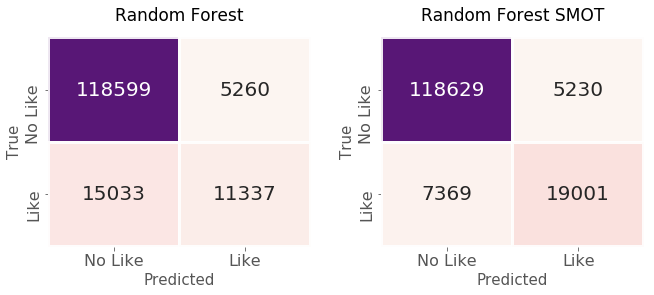

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(9,3.5))

plt.tight_layout(w_pad=4.0)

 

sns.heatmap(confusion_clf1, annot=True, annot_kws={"size": 20},cmap='RdPu',fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.9)

axes[0].set_xticklabels(['No Like', 'Like'], fontsize=16)
axes[0].set_yticklabels(['No Like', 'Like'], fontsize=16)
axes[0].set_ylabel('True', fontsize=15)
axes[0].set_xlabel('Predicted', fontsize=15)
axes[0].set_title("Random Forest", fontsize=17, y=1.05)

sns.heatmap(confusion_clf, annot=True, annot_kws={"size": 20},cmap='RdPu',fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.9)
axes[1].set_xticklabels(['No Like', 'Like'], fontsize=16)
axes[1].set_yticklabels(['No Like', 'Like'], fontsize=16)
axes[1].set_ylabel('True', fontsize=15)
axes[1].set_xlabel('Predicted', fontsize=15)
axes[1].set_title("Random Forest SMOT", fontsize=17, y=1.05)
plt.show()

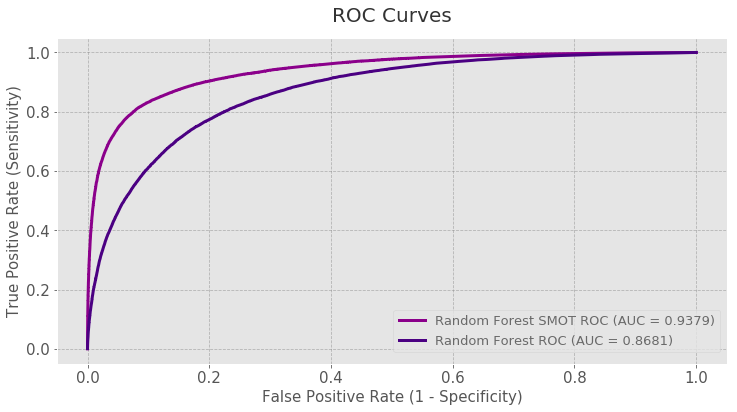

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


plt.style.use(['ggplot'])

plt.figure(figsize=(12,6))

y_pred_clf = clf.predict_proba(X_test)[:,1]
y_pred_clf1 = clf1.predict_proba(X_test)[:,1]


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_clf)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_pred_clf1)


ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)





plt.plot(fpr, tpr, label='Random Forest SMOT ROC (AUC = %0.4f)' % ROC_AUC,color='darkmagenta', linewidth=3)
plt.plot(fpr1, tpr1, label='Random Forest ROC (AUC = %0.4f)' % ROC_AUC1, color='indigo',linewidth=3)




plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
plt.grid(color='gray', linestyle='--', alpha=.5)

l=plt.legend(loc='lower right', fontsize=13,bbox_to_anchor=(1, 0.015))
for text in l.get_texts():
    text.set_color("dimgray")

plt.title('ROC Curves', color="black", alpha=0.8,fontsize=20, y=1.03)
plt.show()

## Approach #2: Models for Each Gender

### Female Model

Basically, I used the same method as above but for each gender. The only difference is that I did not tune and trained algorithms without SMOT as I did in the first approach as I wanted to save time. Note that I tuned and trained Random Forest without SMOT in the first approach for  the purpose of demonstration. 

In [120]:
df_female=df.loc[df['player_gender'] == "female"]



In [121]:
df_female_cont=df_female.drop(['subject_id', 'player_id','player_gender_orientation',\
                                      'player_hometown','player_metro','player_location',\
                                       'player_location','subject_gender_orientation',\
                                      'player_hometown','subject_metro','subject_location',\
                                      'player_gender',
                                      'subject_hometown','like'],axis=1)

In [122]:
df_female_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200402 entries, 0 to 500708
Data columns (total 19 columns):
player_age              200402 non-null int64
player_height           200402 non-null int64
player_age_max          200402 non-null int64
player_age_min          200402 non-null int64
player_distance_max     200402 non-null int64
player_height_min       200402 non-null int64
player_height_max       200402 non-null int64
subject_age             200402 non-null int64
subject_height          200402 non-null int64
subject_age_max         200402 non-null int64
subject_age_min         200402 non-null int64
subject_distance_max    200402 non-null int64
subject_height_min      200402 non-null int64
subject_height_max      200402 non-null int64
distance                200402 non-null float64
player_saved            200402 non-null int64
player_rated            200402 non-null int64
subject_saved           200402 non-null int64
subject_rated           200402 non-null int64
dtypes: float

In [123]:
from sklearn.preprocessing import StandardScaler
x=df_female_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_female_cont.columns)


In [124]:
X_female=df_stand
y_female = df_female.like

In [80]:

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML


rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_female, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_female, y_female, cv=cv, n_jobs=-1)
    print ("{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_female, y_female)
abc.fit(X_female, y_female)
gbc.fit(X_female, y_female)
dtc.fit(X_female, y_female)

importances = pd.DataFrame(list(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              )),
                           index=X_female.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print (display(importances.head(30)))


Random Forest Score:	0.922 ± 0.001
Ada Boost Score:	0.922 ± 0.0
Gradient Boosting Score:	0.924 ± 0.0
Decision Tree Score:	0.874 ± 0.002


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
subject_saved,0.284001,0.26,0.134926,0.129156
subject_rated,0.203676,0.16,0.120901,0.124900
player_rated,0.087679,0.14,0.086082,0.091550
player_saved,0.067300,0.12,0.068709,0.065650
player_age_max,0.053865,0.02,0.049939,0.043136
player_age,0.049278,0.02,0.046735,0.043752
distance,0.048428,0.04,0.115849,0.138995
player_height_min,0.046568,0.06,0.011589,0.012722
player_distance_max,0.046025,0.04,0.045070,0.048539
player_height,0.045449,0.04,0.048632,0.043511


None


As seen below, we get overall higher accuracy scores for female model across selected ensembles.

In [81]:

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_female, y_female,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_female)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(class_weight='balanced',random_state=10)
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)






def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3)))
    print ()
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")





Decision Tree Training Accuracy Score:	0.761 ± 0.004
Decision Tree Test Accuracy Score:	0.764 ± 0.004

Logistic Regres Training Accuracy Score:	0.745 ± 0.003
Logistic Regres Test Accuracy Score:	0.76 ± 0.004

Bagging DT Training Accuracy Score:	0.919 ± 0.001
Bagging DT Test Accuracy Score:	0.918 ± 0.002

Random Forest Training Accuracy Score:	0.922 ± 0.001
Random Forest Test Accuracy Score:	0.922 ± 0.001

Extra Trees Training Accuracy Score:	0.921 ± 0.001
Extra Trees Test Accuracy Score:	0.922 ± 0.001

Ada Boost Training Accuracy Score:	0.923 ± 0.001
Ada Boost Test Accuracy Score:	0.923 ± 0.001

Grad Boosting Training Accuracy Score:	0.923 ± 0.001
Grad Boosting Test Accuracy Score:	0.924 ± 0.001



I chose Extra Tree with SMOT for female model as it was faster to train.  Gradient Boosting with SMOT was showing better accuracy but it would take a much longer time to train it.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler

sm = SMOTE(kind='borderline1')
X_resampled2, y_resampled2 = sm.fit_sample(X_female, y_female)

In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled2)

cv_train2 = StratifiedKFold(y_train2, n_folds=10, shuffle=True, random_state=10)
cv_test2 = StratifiedKFold(y_test2, n_folds=10, shuffle=True, random_state=10)
et1 = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)

def score(model, name):
    train_score = cross_val_score(model, X_train2, y_train2, cv=cv_train2, n_jobs=-1)
    test_score = cross_val_score(model, X_test2, y_test2, cv=cv_test2, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                             test_score.std().round(3)))
score(et1, "Extra Trees") 

Extra Trees Training Accuracy Score:	0.96 ± 0.001
Extra Trees Test Accuracy Score:	0.929 ± 0.002


In [66]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [30,50],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7],
             'n_estimators': [16, 32]} 




clf2 = RandomizedSearchCV(et1,param_distributions=param_grid, n_jobs=-1, cv=cv_train2)

clf2.fit(X_train2, y_train2)

print (clf2.best_score_)
print (clf2.best_params_)
print (clf2.best_estimator_)

0.966901465593521
{'n_estimators': 32, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 50}
ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=50, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=32, n_jobs=-1, oob_score=False, random_state=10,
           verbose=0, warm_start=False)


In [86]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test))

print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 96.23%


In [87]:
from sklearn.metrics import confusion_matrix

y_pred_test=clf2.predict(X_test)
matrix_clf2 = np.array(confusion_matrix(y_test,y_pred_test))

confusion_clf2 = pd.DataFrame(matrix_clf2, index=['No Like','Like'],\
                     columns=['No Like','Like'])

We can see below that even though I drastically improved recall, precision is pretty low compared to the recall. 

In [88]:
from sklearn.metrics import classification_report

print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ()
print (classification_report(y_test, y_pred_test))

Test Accuracy: 96.23%

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     55458
          1       0.69      0.94      0.79      4663

avg / total       0.97      0.96      0.96     60121



Next, I repeated the same process for male model. 

### Male Model

In [152]:
df_male=df.loc[df['player_gender'] == "male"]

In [153]:
df_male_cont=df_male.drop(['subject_id', 'player_id','player_gender_orientation',\
                                      'player_hometown','player_metro','player_location',\
                                       'player_location','subject_gender_orientation',\
                                      'player_hometown','subject_metro','subject_location',\
                                      'player_gender',
                                      'subject_hometown','like'],axis=1)

In [154]:
from sklearn.preprocessing import StandardScaler
x=df_male_cont

X_norm =  StandardScaler().fit_transform(x);

df_stand=pd.DataFrame(X_norm, columns=df_male_cont.columns)

In [155]:
X_male=df_stand
y_male = df_male.like


In [93]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML


rf = RandomForestClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
dtc = DecisionTreeClassifier(random_state=10)

cv = StratifiedKFold(y_male, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_male, y_male, cv=cv, n_jobs=-1)
    print ("{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_male, y_male)
abc.fit(X_male, y_male)
gbc.fit(X_male, y_male)
dtc.fit(X_male, y_male)

importances = pd.DataFrame(list(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              )),
                           index=X_female.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print (display(importances.head(30)))

Random Forest Score:	0.814 ± 0.001
Ada Boost Score:	0.78 ± 0.002
Gradient Boosting Score:	0.792 ± 0.001
Decision Tree Score:	0.739 ± 0.003


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
subject_saved,0.274571,0.26,0.150293,0.154137
subject_rated,0.220326,0.26,0.131451,0.131114
player_age,0.079900,0.06,0.049750,0.055089
player_rated,0.075596,0.08,0.083236,0.089136
player_saved,0.064075,0.10,0.056828,0.053386
player_height,0.056465,0.02,0.051509,0.053185
player_age_max,0.053671,0.06,0.053787,0.055356
player_distance_max,0.052751,0.02,0.047463,0.048078
player_age_min,0.040281,0.02,0.038785,0.038206
player_height_max,0.035929,0.04,0.007314,0.007933


None


I got overall lower prediction accuracy for male model than in the previous models across the algorithms.

In [94]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_male)

cv_train = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=10)
cv_test = StratifiedKFold(y_test, n_folds=10, shuffle=True, random_state=10)

lg= LogisticRegression(random_state=10,class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50,random_state=10)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=10),random_state=10)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1,random_state=10)
abc = AdaBoostClassifier(random_state=10)
gbst = GradientBoostingClassifier(random_state=10)


def score(model, name):
    train_score = cross_val_score(model, X_train, y_train, cv=cv_train, n_jobs=-1)
    test_score = cross_val_score(model, X_test, y_test, cv=cv_test, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                                test_score.std().round(3)))
    print ()
        
score(dt,"Decision Tree")
score(lg, "Logistic Regres")
score(bdt, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Grad Boosting")


Decision Tree Training Accuracy Score:	0.7 ± 0.003
Decision Tree Test Accuracy Score:	0.687 ± 0.004

Logistic Regres Training Accuracy Score:	0.677 ± 0.004
Logistic Regres Test Accuracy Score:	0.672 ± 0.005

Bagging DT Training Accuracy Score:	0.794 ± 0.002
Bagging DT Test Accuracy Score:	0.785 ± 0.003

Random Forest Training Accuracy Score:	0.809 ± 0.004
Random Forest Test Accuracy Score:	0.798 ± 0.002

Extra Trees Training Accuracy Score:	0.81 ± 0.003
Extra Trees Test Accuracy Score:	0.8 ± 0.003

Ada Boost Training Accuracy Score:	0.779 ± 0.002
Ada Boost Test Accuracy Score:	0.78 ± 0.003

Grad Boosting Training Accuracy Score:	0.793 ± 0.002
Grad Boosting Test Accuracy Score:	0.791 ± 0.003



I chose Random Forest with SMOT for male model.

In [156]:
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler

ada = ADASYN()
X_resampled3, y_resampled3 = ada.fit_sample(X_male, y_male)

In [157]:
from sklearn.cross_validation import train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled3, y_resampled3,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_resampled3)

cv_train3 = StratifiedKFold(y_train3, n_folds=10, shuffle=True, random_state=10)
cv_test3 = StratifiedKFold(y_test3, n_folds=10, shuffle=True, random_state=10)
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1,random_state=10)

def score(model, name):
    train_score = cross_val_score(model, X_train3, y_train3, cv=cv_train3, n_jobs=-1)
    test_score = cross_val_score(model, X_test3, y_test3, cv=cv_test3, n_jobs=-1)
    print ("{} Training Accuracy Score:\t{:0.3} ± {:0.3}".format(name, train_score.mean().round(3),\
                                                                train_score.std().round(3)))
    print ("{} Test Accuracy Score:\t{:0.3} ± {:0.3}".format(name, test_score.mean().round(3),\
                                                             test_score.std().round(3)))
score(rf2, "Random Forest") 

Random Forest Training Accuracy Score:	0.858 ± 0.001
Random Forest Test Accuracy Score:	0.841 ± 0.002


In [18]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.grid_search import RandomizedSearchCV



param_grid = {"max_depth": [30,50],
             "max_features": [None, "auto"],
             "min_samples_split": [2, 5, 7],
             'n_estimators': [16, 32]} 




clf3 = RandomizedSearchCV(rf2,param_distributions=param_grid, n_jobs=-1, cv=cv_train3)

clf3.fit(X_train3, y_train3)

print (clf3.best_score_)
print (clf3.best_params_)
print (clf3.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.8777240838868572
{'n_estimators': 32, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 30}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)


In [98]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test))

print('Test Accuracy: %.2f%%' % (100 * test_acc))

Test Accuracy: 87.94%


In [99]:
from sklearn.metrics import confusion_matrix

y_pred_test=clf3.predict(X_test)
matrix_clf3 = np.array(confusion_matrix(y_test,y_pred_test))

confusion_clf3 = pd.DataFrame(matrix_clf3, index=['No Like','Like'],\
                     columns=['No Like','Like'])

I got similar precision and recall as in the model for both genders.

In [100]:
from sklearn.metrics import classification_report

print('Test Accuracy: %.2f%%' % (100 * test_acc))
print ()
print (classification_report(y_test, y_pred_test))

Test Accuracy: 87.94%

             precision    recall  f1-score   support

          0       0.91      0.93      0.92     68402
          1       0.77      0.72      0.74     21707

avg / total       0.88      0.88      0.88     90109



Although, it does not seem that I got a significant improvement in my precision using male/female approach, I was able to improve recall. Overall, predicted likes in the second approach (two models for each gender) were 19,985 (4,387 + 15,598) and predicted likes in the first approach (model for both genders) were 19,001. That is, I got 984 more predicted likes using the second approach. However, my precision has significantly suffered and that gave me a below average AUC score (0.6626) for female model. 

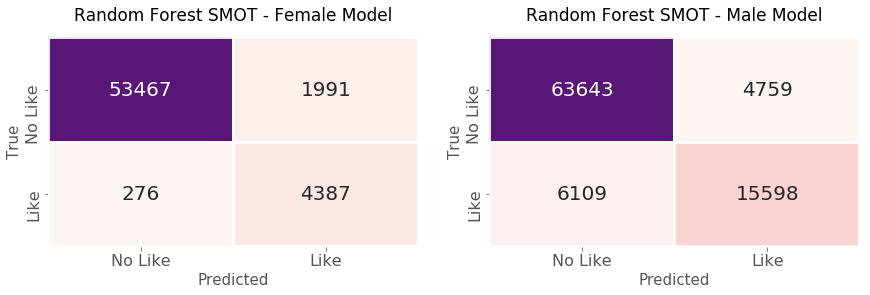

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(12,3.5))

plt.tight_layout(w_pad=4.0)

sns.heatmap(confusion_clf2, annot=True, annot_kws={"size": 20},cmap='RdPu',fmt='g', cbar=False,linewidths=2,ax=axes[0], alpha=.9)

axes[0].set_xticklabels(['No Like', 'Like'], fontsize=16)
axes[0].set_yticklabels(['No Like', 'Like'], fontsize=16)
axes[0].set_ylabel('True', fontsize=15)
axes[0].set_xlabel('Predicted', fontsize=15)
axes[0].set_title("Extra Tree SMOT - Female Model", fontsize=17, y=1.05)

sns.heatmap(confusion_clf3, annot=True, annot_kws={"size": 20},cmap='RdPu',fmt='g', cbar=False,linewidths=2,ax=axes[1], alpha=.9)
axes[1].set_xticklabels(['No Like', 'Like'], fontsize=16)
axes[1].set_yticklabels(['No Like', 'Like'], fontsize=16)
axes[1].set_ylabel('True', fontsize=15)
axes[1].set_xlabel('Predicted', fontsize=15)
axes[1].set_title("Random Forest SMOT - Male Model", fontsize=17, y=1.05)
plt.show()

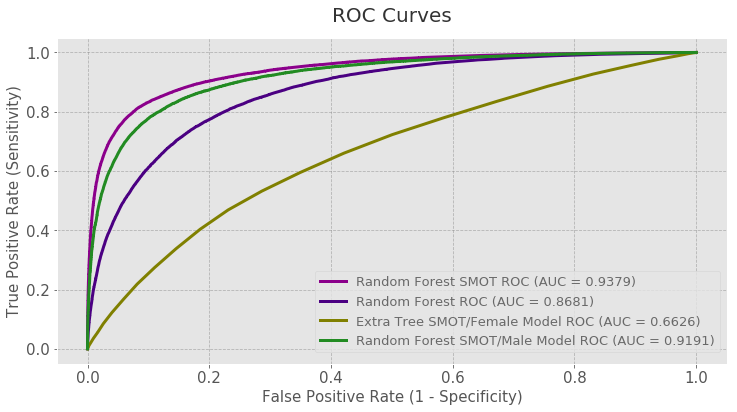

In [111]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


plt.style.use(['ggplot'])

plt.figure(figsize=(12,6))

X_train0, X_test0, y_train0, y_test0 = train_test_split(X_all, y_all,
                                                    train_size=0.7,
                                                    random_state=10,
                                                    stratify=y_all)

y_pred_clf = clf.predict_proba(X_test0)[:,1]
y_pred_clf1 = clf1.predict_proba(X_test0)[:,1]
y_pred_clf2 = clf2.predict_proba(X_test)[:,1]
y_pred_clf3 = clf3.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test0, y_pred_clf)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test0,y_pred_clf1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,y_pred_clf2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test,y_pred_clf3)
ROC_AUC = auc(fpr, tpr)
ROC_AUC1 = auc(fpr1, tpr1)
ROC_AUC2 = auc(fpr2, tpr2)
ROC_AUC3 = auc(fpr3, tpr3)



plt.plot(fpr, tpr, label='Random Forest SMOT ROC (AUC = %0.4f)' % ROC_AUC,color='darkmagenta', linewidth=3)
plt.plot(fpr1, tpr1, label='Random Forest ROC (AUC = %0.4f)' % ROC_AUC1, color='indigo',linewidth=3)
plt.plot(fpr2, tpr2, label='Extra Tree SMOT/Female Model ROC (AUC = %0.4f)' % ROC_AUC2, color='olive',linewidth=3)
plt.plot(fpr3, tpr3, label='Random Forest SMOT/Male Model ROC (AUC = %0.4f)' % ROC_AUC3, color='forestgreen',linewidth=3)




plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
plt.grid(color='gray', linestyle='--', alpha=.5)

l=plt.legend(loc='lower right', fontsize=13,bbox_to_anchor=(1, 0.015))
for text in l.get_texts():
    text.set_color("dimgray")

plt.title('ROC Curves', color="black", alpha=0.8,fontsize=20, y=1.03)
plt.show()

What does high recall and low precision mean? It means that the classifier also classifies more no-likes as likes but by doing so it also classify more likes as likes. It depends on the business whether low precision and high recall worth it, this decision depends on whether low precision can be ignored and high recall is given more weight. Note the precision for female model in the second approach can be improved. I did get better precision scores with Gradient Boosting algorithm, however, it would take me more time to train it (several hours) so I went with Random Forest and Extra Tree. Both approaches are work in progress. There is a huge room for improvement given I have more time. If I had more time, I would be able to increase accuracy of precision and, most importantly, recall even more for all models.

There might be some challenges productionizing the algorithm(s). SMOT increases complexity of the algorithm and hence leads to more technical complexity that might slow down the automation or be possible more costly to implement. It might be especially an issue for the male/female approach because it uses two separate algorithms. However, improving recall accuracy might worth it, depending on the business goal.
        
        
        

In conclusion, I would like to share several fun ideas and suggestions. First, I would like to add more features and see how their can improve predictive accuracy. I have never explored whether location, metro, or hometown can help to improve the algorithm(s). It is interesting to see whether hometown can be an important feature. Also, population can affect mating preferences. Adding to the algorithm population of cities may improve its predictive accuracy. I would abstain from adding location directly to the model directly categorizing them into smaller categories. Such approach could lead to overfitting and decrease predictive accuracy of the algorithm(s), and actually, it makes little sense considering that we have the feature ‘distance.’   The most interesting predictor could be sex ratio of the cities. There have been a numerous body of research in social science indicating that sex ratio significantly affects mating preferences. For example, in the cities with more female population, males are less likely to seek serious relationship. 

Second, I would like to devote more time to feature engineering, explore possible interactions that can improve precision and recall accuracies. The algorithm for both genders could especially benefit from interactions. But I would need some time to explore possible interactions and its effect on the algorithm. 

Third, it is possible to utilize mixed effects model and see whether it can outperform ensembles. In this type of model, it is possible to control for different locations. I have built several mixed effects algorithms in the past, and there are very effective when data streams from different locations. 

Finally, I would like to use Python packages such as Auto-Weka, Spearmint, and Hyperopt that are designed for more efficient and fast optimization. It took me hours to optimize my algorithms while these packages could significantly save time and select the best possible optimized algorithm. That could significantly improve predictive accuracy as well. For example, Hyperopt package provides algorithms that are able to outperform randomized search and can find results comparable to a grid search while fitting substantially less models. I used randomized search to tune my algorithms and it took me around 1.5 hours to optimize each one. 
